In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from copy import copy
from matplotlib.colors import LogNorm
#from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator
from matplotlib.pyplot import cm

from process_functions import *

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']

## Load Processed Data

In [2]:
#Data Unfolded From Django
cuts_h1djgo       = np.load('cuts.npy')
jet_pT_h1djgo     = np.load('jet_pT.npy')[cuts_h1djgo]
q_perp_h1djgo     = np.load('q_perp.npy')[cuts_h1djgo]
asymm_phi_h1djgo  = np.load('asymm_angle.npy')[cuts_h1djgo]
weights_h1djgo    = np.load('weights.npy')[cuts_h1djgo]
mc_weights_h1djgo = np.load("mc_weights.npy")[cuts_h1djgo]
nn_weights_h1djgo = np.load("nn_weights.npy")[cuts_h1djgo]


In [3]:
#Data Unfolded From Rapgap
cuts_h1rpgp       = np.load('from_rapgap_cuts.npy')
jet_pT_h1rpgp     = np.load('from_rapgap_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load('from_rapgap_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load('from_rapgap_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load('from_rapgap_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load("from_rapgap_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load("from_rapgap_nn_weights.npy")[cuts_h1rpgp]


In [4]:
print(len(cuts_h1rpgp))
print(len(cuts_h1djgo))

54120771
57882501


In [4]:
Rapgap_Iterations = {}
Django_Iterations = {}
NIter=30
folder = "/global/ml4hep/spss/ftoralesacosta/new_models/"
#file = "June10_Iter30pass4_rapgap_weights.npy"
#file = "June10_Iter30Django_pass4_weights.npy"
django_file = "June10_Django_Iter30_PassAvgs.npy"
file    =     "June10_Rapgap_Iter30_PassAvgs.npy"
#file = "June10_Iter30_Rapgap_pass0_weights.npy"

In [ ]:
pass_avg_weights = np.load(folder+file)
django_pass_avg_weights = np.load(folder+django_file)

In [6]:
print(np.shape(pass_avg_weights))
print(np.shape(django_pass_avg_weights))

(30, 54120771)
(30, 57882501)


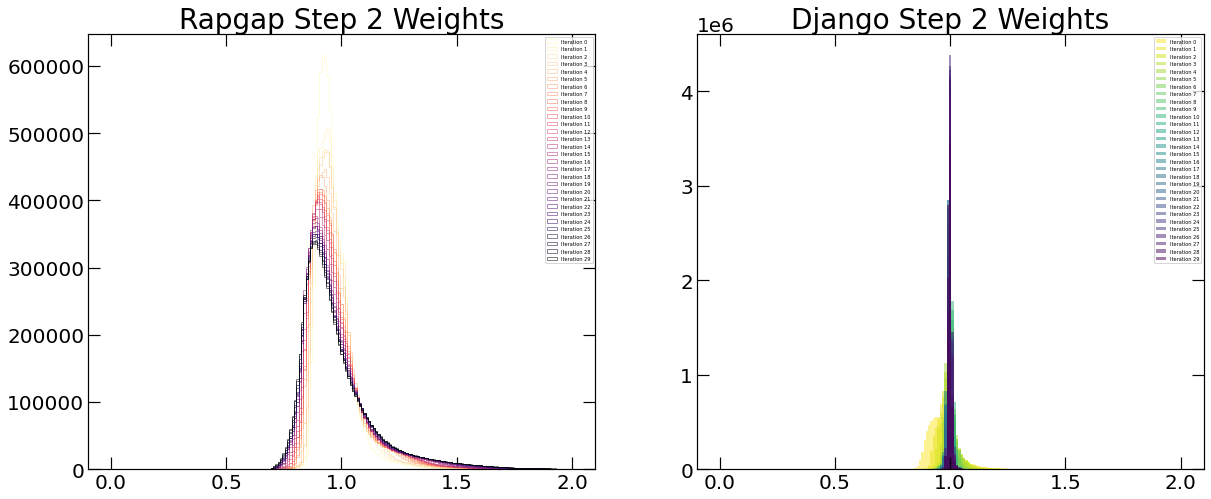

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
axes = axes.ravel()

weights_mult = np.ones(0)
weights_mult_D = np.ones(0)

colors = cm.magma(np.linspace(0, 1, NIter))
colors = colors[::-1]

d_colors = cm.viridis(np.linspace(0, 1, NIter))
d_colors = d_colors[::-1]

for i in range(0,NIter,1):

    axes[0].hist(pass_avg_weights[i][cuts_h1rpgp], bins=np.linspace(0,2,200), label="Iteration %i"%(i), alpha=0.5, color=colors[i],histtype='step')
    axes[1].hist(django_pass_avg_weights[i][cuts_h1djgo], bins=np.linspace(0,2,200), label="Iteration %i"%(i),alpha=0.5, color=d_colors[i])

axes[0].set_title("Rapgap Step 2 Weights")
axes[1].set_title("Django Step 2 Weights")
axes[0].legend(fontsize=5)
axes[1].legend(fontsize=5)
plt.savefig("Weight_Histogram_%i_Iterations.pdf"%(NIter))

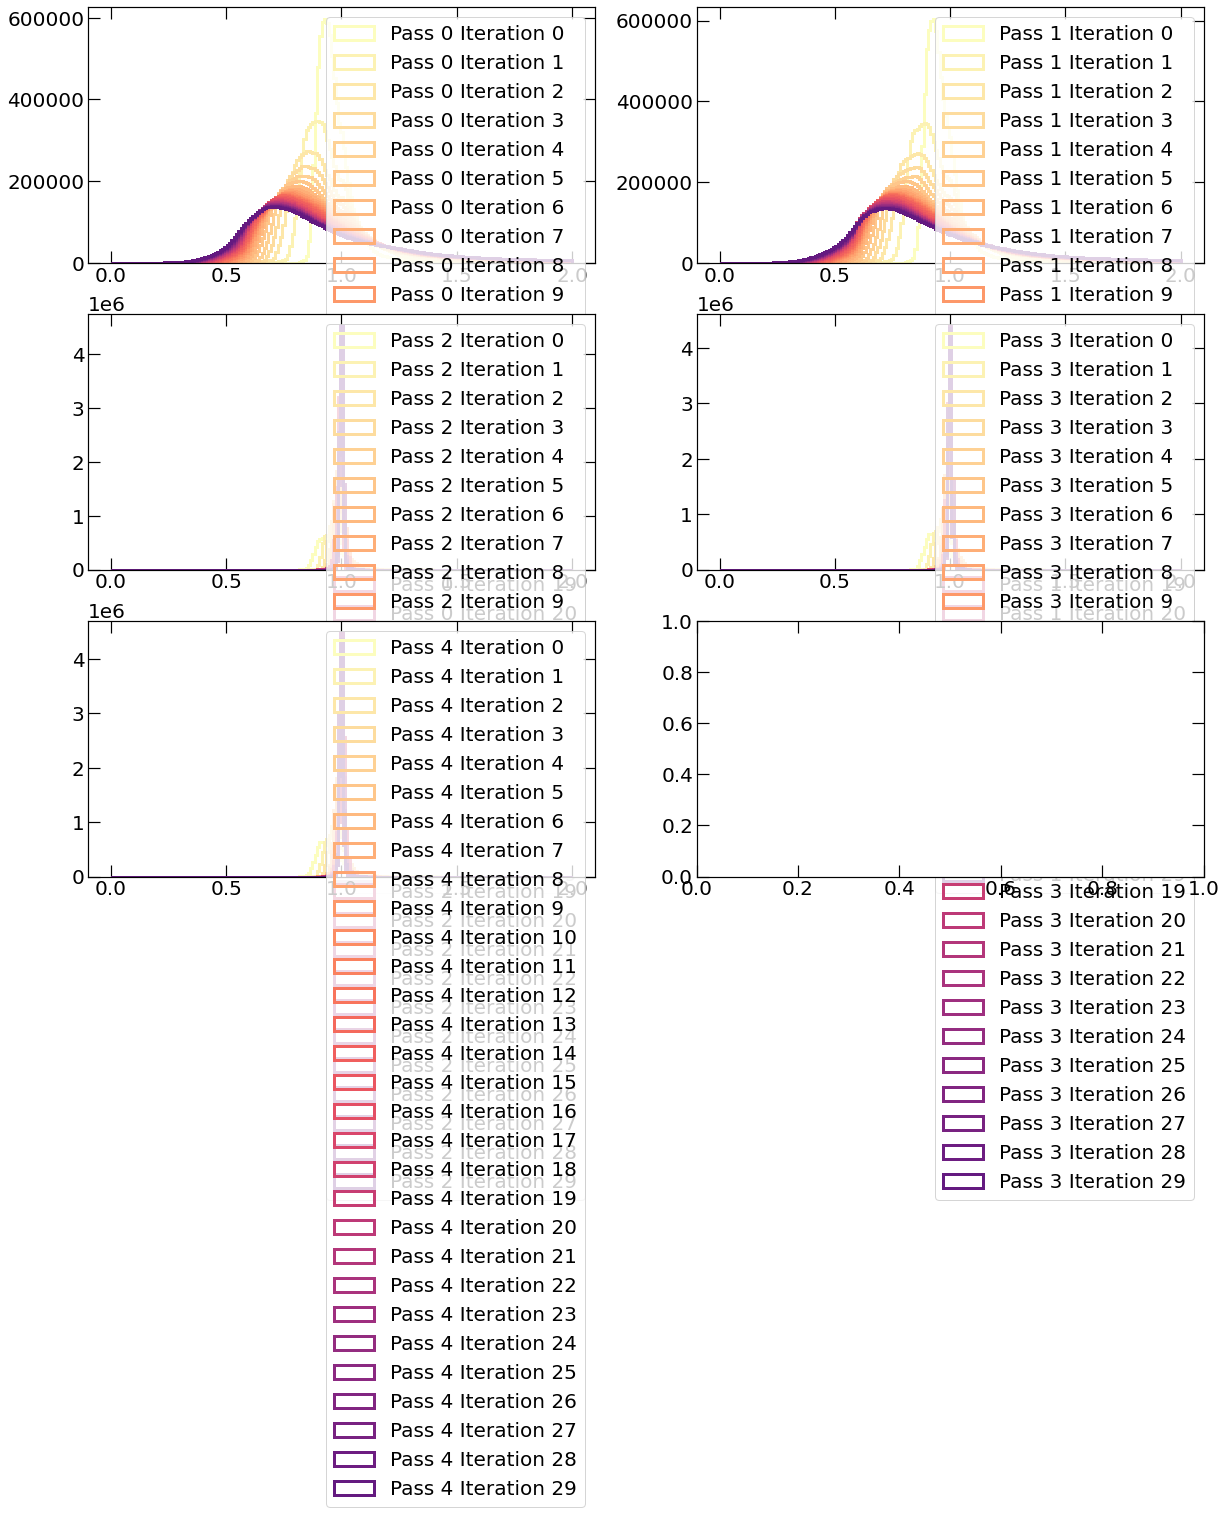

In [5]:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(20,16))
axes = axes.ravel()

weights_mult = np.ones(0)
weights_mult_D = np.ones(0)

colors = cm.magma(np.linspace(0.6, 1, NIter))
colors = colors[::-1]

d_colors = cm.viridis(np.linspace(0.6, 1, NIter))
d_colors = d_colors[::-1]

N_passes = 5
for p in range(0,N_passes):
    
    #django_file = "June10_Django_Iter30_PassAvgs.npy"
    #file    =     f"June10_Rapgap_Iter30_PassAvgs.npy"
    file = f"June10_Iter30_Rapgap_pass{p}_weights.npy"
    #file = "June10_Iter30_Rapgap_pass0_weights.npy"
    pass_avg_weights = np.load(folder+file)[:100_000]
    rcuts = cuts_h1rpgp[:100_000]
    #django_pass_avg_weights = np.load(folder+django_file)
    for i in range(0,NIter,1):

        axes[p].hist(pass_avg_weights[i][rcuts],bins=np.linspace(0,2,200), label=f"Pass {p} Iteration {i}", alpha=1.0, color=colors[i],histtype='step',linewidth=3)
        #axes[1].hist(django_pass_avg_weights[i][cuts_h1djgo],bins=np.linspace(0,2,200),label="Iteration %i"%(i),alpha=0.5, color=d_colors[i])
        axes[p].legend()
#axes[0].set_title("Rapgap Step 2 Weights")
#axes[1].set_title("Django Step 2 Weights")
#axes[0].legend(fontsize=5)
#axes[1].legend(fontsize=5)
#plt.savefig("Rapgap_Weight_Histogram_%i_Iterations.pdf"%(NIter))

In [ ]:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(20,16))
axes = axes.ravel()

weights_mult = np.ones(0)
weights_mult_D = np.ones(0)

colors = cm.magma(np.linspace(0.2, 0.9, NIter))
colors = colors[::-1]

d_colors = cm.viridis(np.linspace(0.2, 0.9, NIter))
d_colors = d_colors[::-1]

N_Events = 100_000
sum_over_passes = np.zeros((30,N_Events))
N_passes = 5

stdevs = np.zeros((N_passes,NIter))

for p in range(0,N_passes):
    
    #file    =     f"June10_Rapgap_Iter30_PassAvgs.npy"
    #file = f"July1_Iter30_Django_pass{p}_weights.npy"
    file = f"June10_Iter30_Django_pass{p}_weights.npy"
    django_pass_avg_weights = np.load(folder+file)[:,:N_Events]
    dcuts = cuts_h1djgo[:N_Events]
    mult_weights = np.ones(N_Events)
    
    for i in range(0,NIter,1):
        mult_weights *= django_pass_avg_weights[i]
        axes[p].hist(mult_weights[dcuts],bins=np.linspace(0,2,200), label=f"Pass {p} Iteration {i}", alpha=1.0, color=colors[i],histtype='step',linewidth=3)
        axes[p].legend(fontsize=8,ncol=2)
        axes[p].set_title(f"Django Pass {p}")
        
        #print(f"Pass {p} Iter {i}:", django_pass_avg_weights[i,:10])
        sum_over_passes[i] += mult_weights
        stdevs[p][i] = np.std(mult_weights)
        
    print()
    
avg_over_passes = sum_over_passes/N_passes
for i in range(0,NIter,1):
    axes[N_passes].hist(avg_over_passes[i][dcuts],bins=np.linspace(0,2,200), label=f"Pass Avg. Iteration {i}", alpha=1.0, color=colors[i],histtype='step',linewidth=3)
    axes[N_passes].set_title("Django Pass Average")

#plt.savefig("Rapgap_Weight_Histogram_%i_Iterations.pdf"%(NIter))

[0.05892618 0.10886996 0.15970008 0.20987496 0.26017642 0.30804426
 0.35258237 0.38943794 0.40869795 0.44177912 0.47549236 0.47422879
 0.47919859 0.48036422 0.48585418 0.4869224  0.49195564 0.5090061
 0.52613073 0.53304303 0.54436986 0.55980732 0.56668167 0.58896479
 0.61607193 0.6555683  0.69078679 0.72538352 0.76818778 0.81296873]
[0.05892618 0.10886996 0.15970008 0.20987496 0.26017642 0.30804426
 0.35258237 0.38943794 0.40869795 0.44177912 0.47549236 0.47422879
 0.47919859 0.48036422 0.48585418 0.4869224  0.49195564 0.5090061
 0.52613073 0.53304303 0.54436986 0.55980732 0.56668167 0.58896479
 0.61607193 0.6555683  0.69078679 0.72538352 0.76818778 0.81296873]
[0.05892618 0.10886996 0.15970008 0.20987496 0.26017642 0.30804426
 0.35258237 0.38943794 0.40869795 0.44177912 0.47549236 0.47422879
 0.47919859 0.48036422 0.48585418 0.4869224  0.49195564 0.5090061
 0.52613073 0.53304303 0.54436986 0.55980732 0.56668167 0.58896479
 0.61607193 0.6555683  0.69078679 0.72538352 0.76818778 0.81296

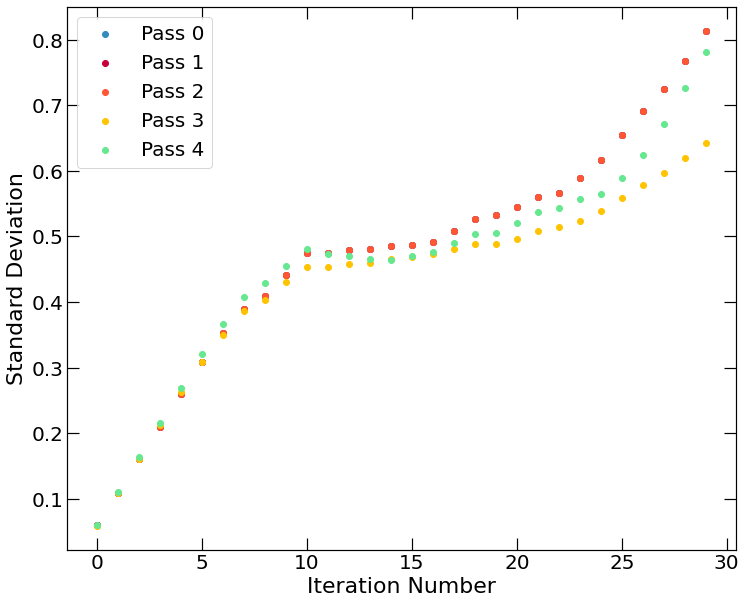

In [39]:
for p in range(0, N_passes, 1):
    plt.scatter(np.linspace(0,NIter-1,NIter),stdevs[p],label=f"Pass {p}")
    print(stdevs[p])
    plt.legend()
    plt.xlabel("Iteration Number")
    plt.ylabel("Standard Deviation")
    

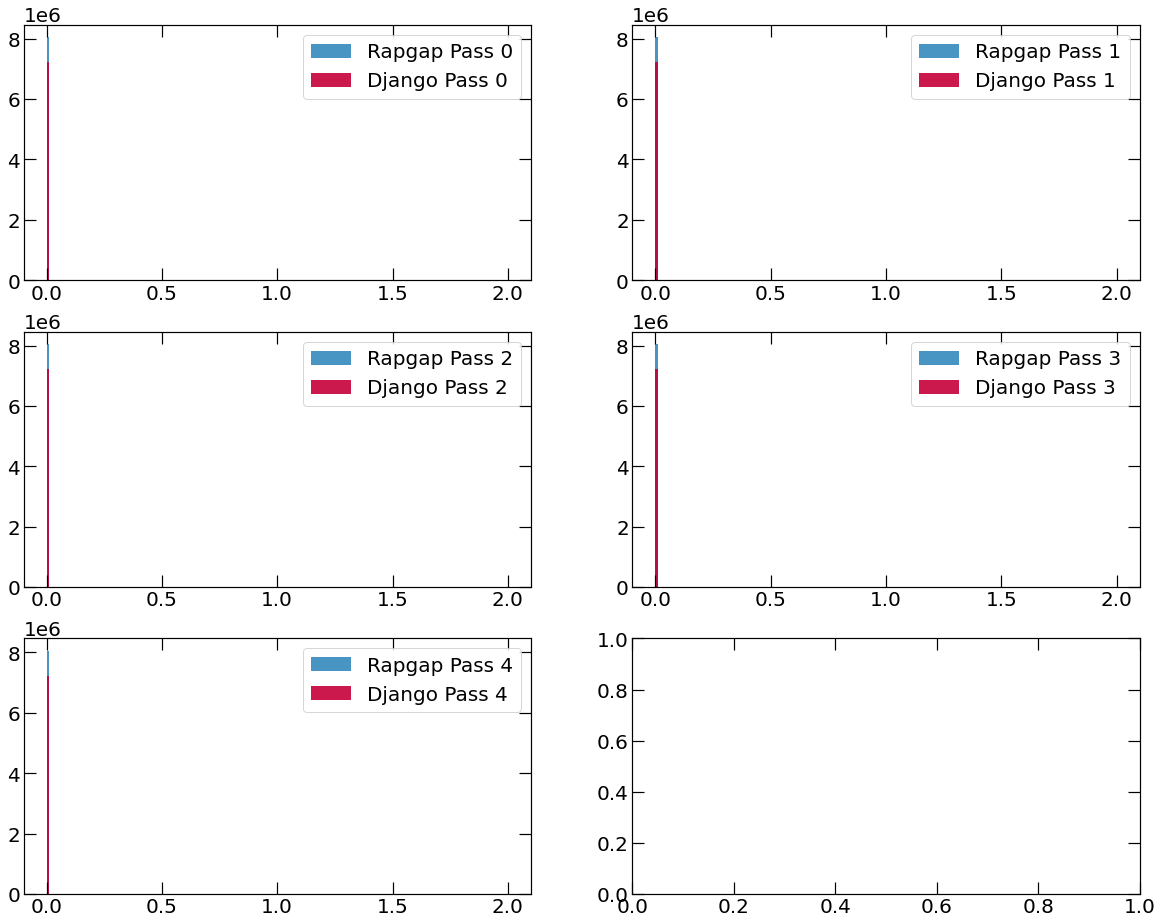

In [13]:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(20,16))
axes = axes.ravel()

weights_mult = np.ones(0)
weights_mult_D = np.ones(0)

colors = cm.magma(np.linspace(0, 1, NIter))
colors = colors[::-1]

d_colors = cm.viridis(np.linspace(0, 1, NIter))
d_colors = d_colors[::-1]

N_passes = 5
for p in range(0,N_passes):
    
    #django_file = "June10_Django_Iter30_PassAvgs.npy"
    #file    =     f"June10_Rapgap_Iter30_PassAvgs.npy"
    #django_file = f"June10_Iter30_Django_pass{p}_weights.npy"
    django_file = f"AdditionalKinematics_Iter30_Pass{p}nominalDjango_nominal_NNweights_step2_Pass{p}.npy"
    file = f"AdditionalKinematics_Iter30_Pass{p}nominalRapgap_nominal_NNweights_step2_Pass{p}.npy"
    pass_avg_weights = np.load(folder+file)
    django_pass_avg_weights = np.load(folder+django_file)
    #for i in range(0,NIter,1):

        #axes[p].hist(django_pass_avg_weights[i][cuts_h1djgo],bins=np.linspace(0,2,200),label="Iteration %i"%(i),alpha=0.5, color=d_colors[i])
    axes[p].hist(pass_avg_weights[cuts_h1rpgp],bins=np.linspace(0,2,200),label="Rapgap Pass %i"%(p),alpha=0.9)
    axes[p].hist(django_pass_avg_weights[cuts_h1djgo],bins=np.linspace(0,2,200),label="Django Pass %i"%(p),alpha=0.9)
    axes[p].legend()

#axes[0].set_title("Rapgap Step 2 Weights")
#axes[1].set_title("Django Step 2 Weights")
#axes[0].legend(fontsize=5)
#axes[1].legend(fontsize=5)
#plt.savefig("Rapgap_Weight_Histogram_%i_Iterations.pdf"%(NIter))

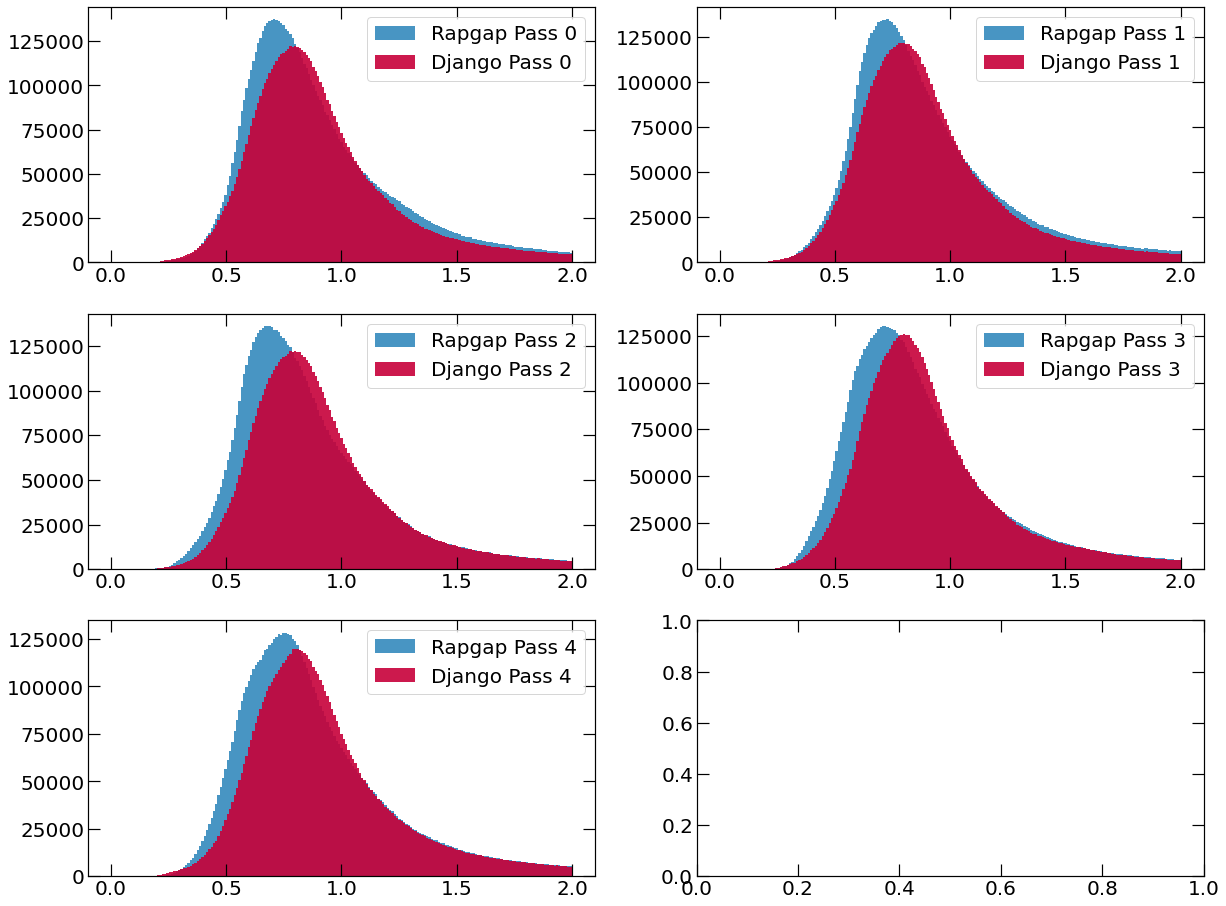

In [12]:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(20,16))
axes = axes.ravel()

weights_mult = np.ones(0)
weights_mult_D = np.ones(0)

colors = cm.magma(np.linspace(0, 1, NIter))
colors = colors[::-1]

d_colors = cm.viridis(np.linspace(0, 1, NIter))
d_colors = d_colors[::-1]

N_passes = 5
for p in range(0,N_passes):
    
    #django_file = "June10_Django_Iter30_PassAvgs.npy"
    #file    =     f"June10_Rapgap_Iter30_PassAvgs.npy"
    #django_file = f"June10_Iter30_Django_pass{p}_weights.npy"
    django_file = f"July1_Iter30_Pass{p}nominalDjango_nominal_NNweights_step2_Pass{p}.npy"
    file = f"June10_Iter30_Pass{p}nominalRapgap_nominal_NNweights_step2_Pass{p}.npy"
    pass_avg_weights = np.load(folder+file)
    django_pass_avg_weights = np.load(folder+django_file)
    #for i in range(0,NIter,1):

        #axes[p].hist(django_pass_avg_weights[i][cuts_h1djgo],bins=np.linspace(0,2,200),label="Iteration %i"%(i),alpha=0.5, color=d_colors[i])
    axes[p].hist(pass_avg_weights[cuts_h1rpgp],bins=np.linspace(0,2,200),label="Rapgap Pass %i"%(p),alpha=0.9)
    axes[p].hist(django_pass_avg_weights[cuts_h1djgo],bins=np.linspace(0,2,200),label="Django Pass %i"%(p),alpha=0.9)
    axes[p].legend()

#axes[0].set_title("Rapgap Step 2 Weights")
#axes[1].set_title("Django Step 2 Weights")
#axes[0].legend(fontsize=5)
#axes[1].legend(fontsize=5)
#plt.savefig("Rapgap_Weight_Histogram_%i_Iterations.pdf"%(NIter))

In [ ]:
#Make Dictionaries and Binning
#N_Bins = 10
q_max = 10.0
q_perp_bins = np.array([ 0., 1., 2., 3., 4., 5., 6., 8., 10.])
N_Bins = len(q_perp_bins)-1
digits = np.digitize(q_perp_h1rpgp,q_perp_bins)-1
keys=["q_perp","phi","cos1","cos2","cos3"]

In [ ]:
print(len(cuts_h1djgo))

/tmp/ipykernel_26574/3127665057.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(18,8),constrained_layout=True)


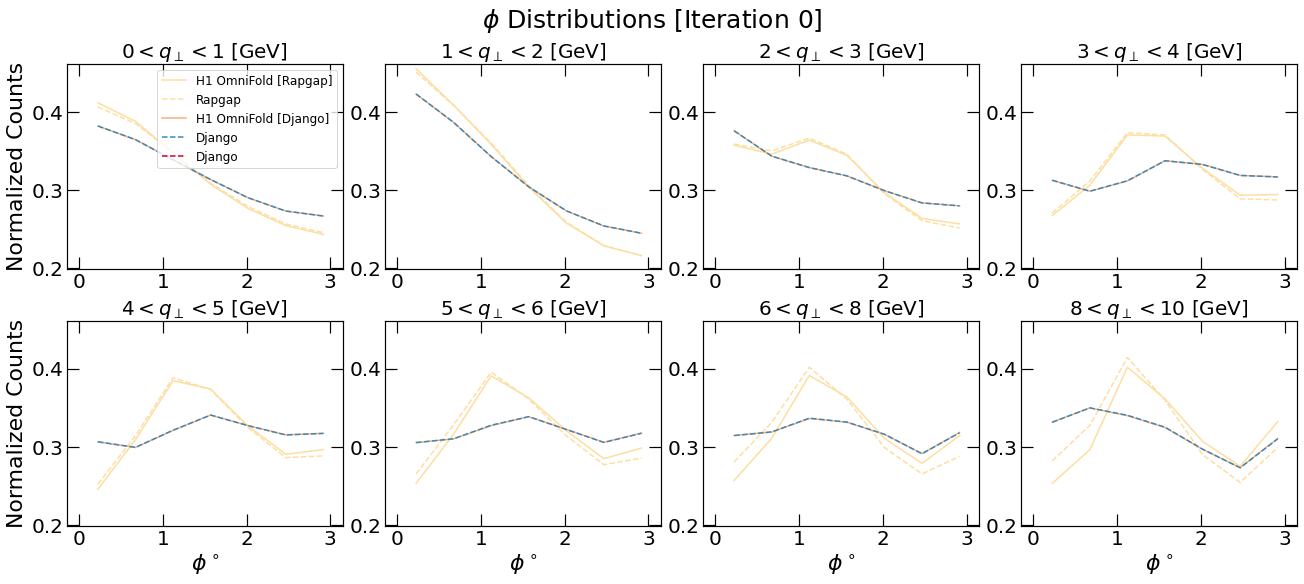

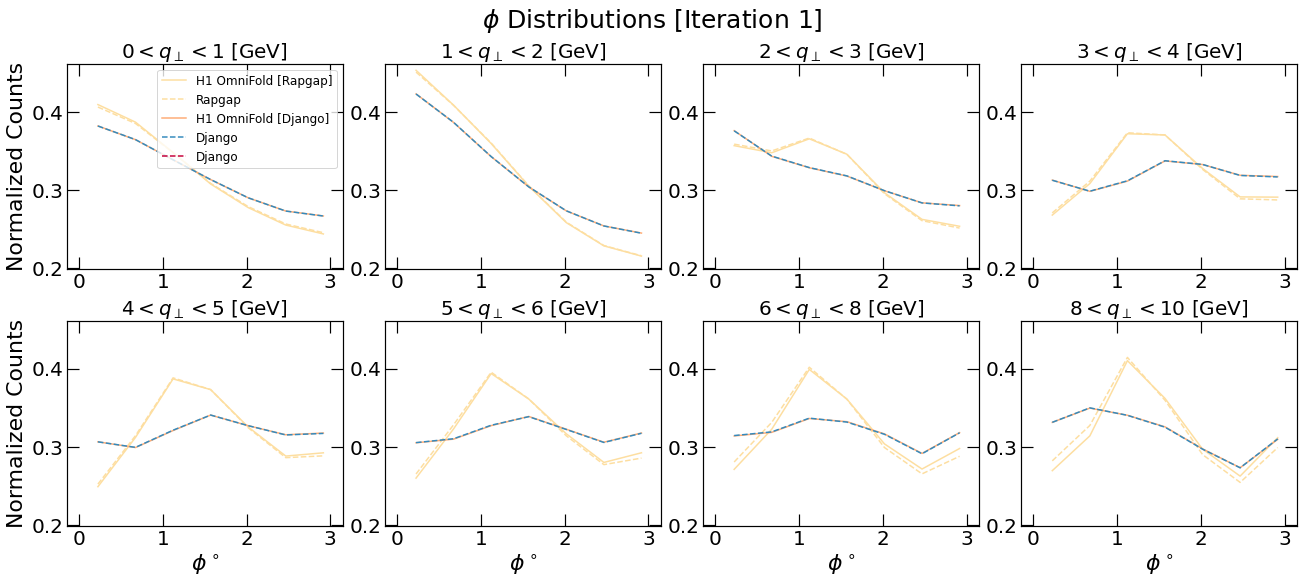

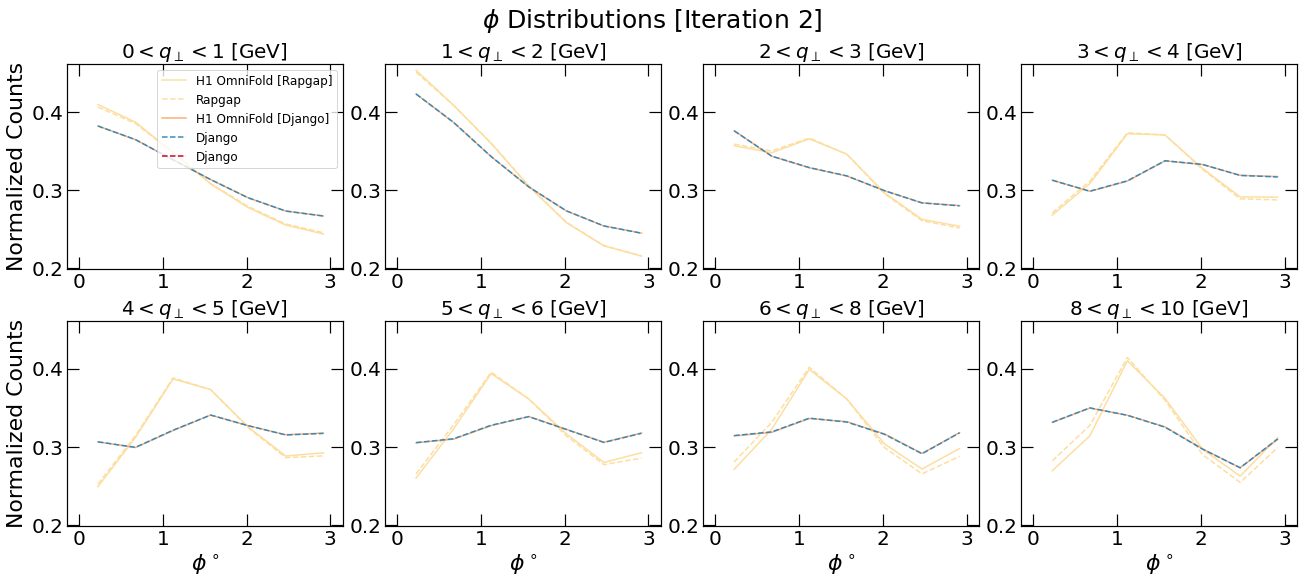

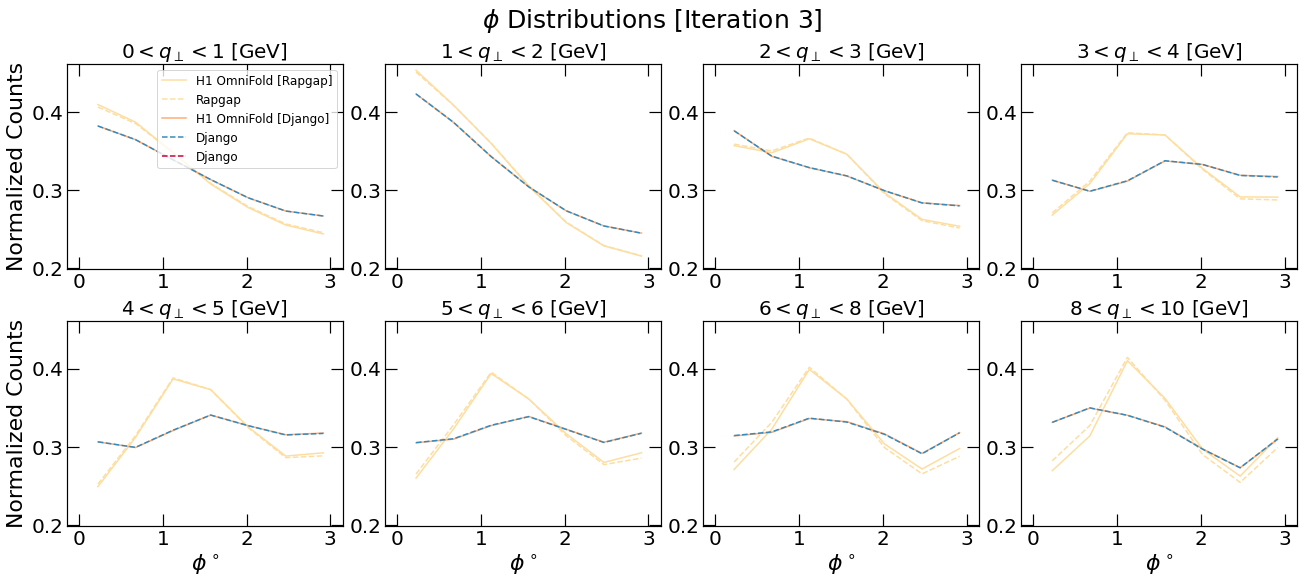

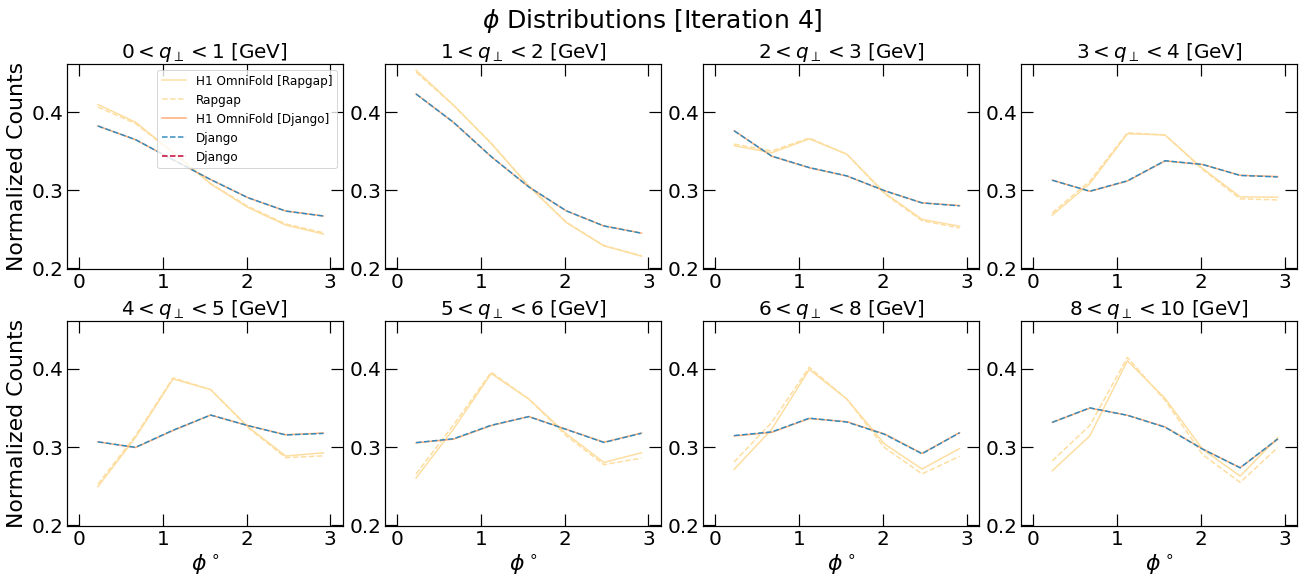

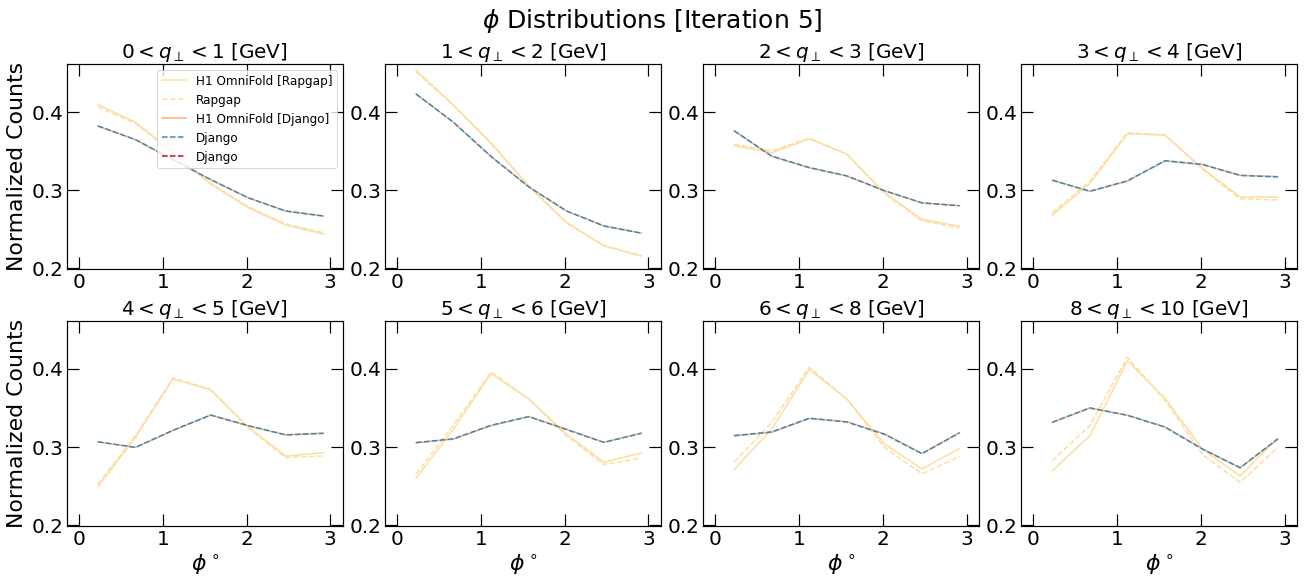

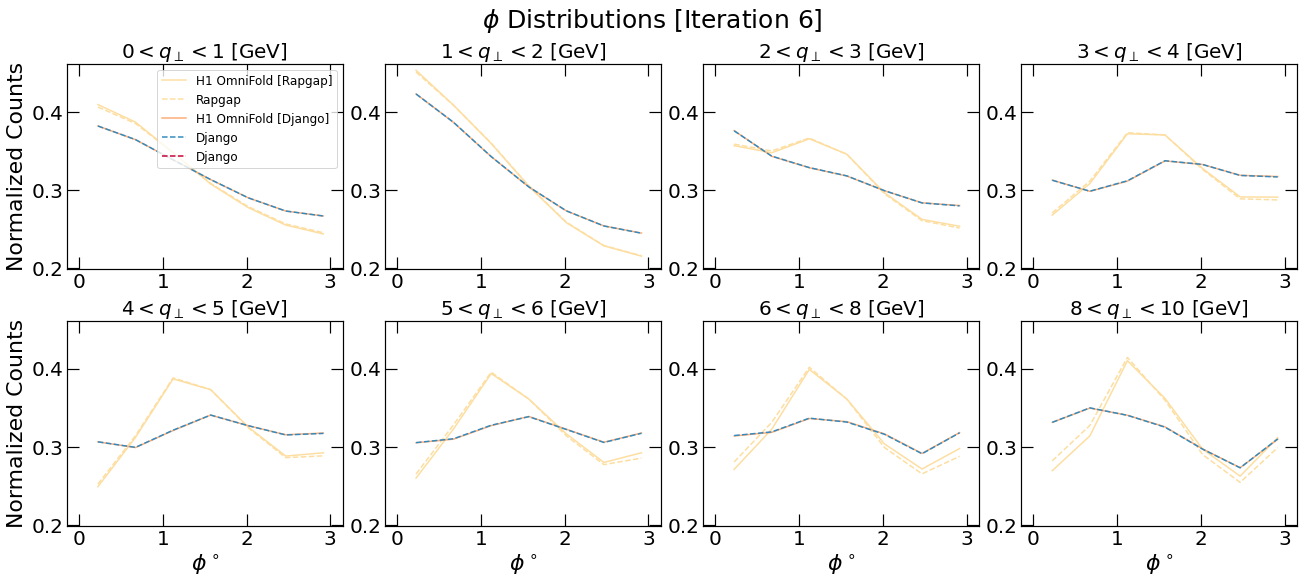

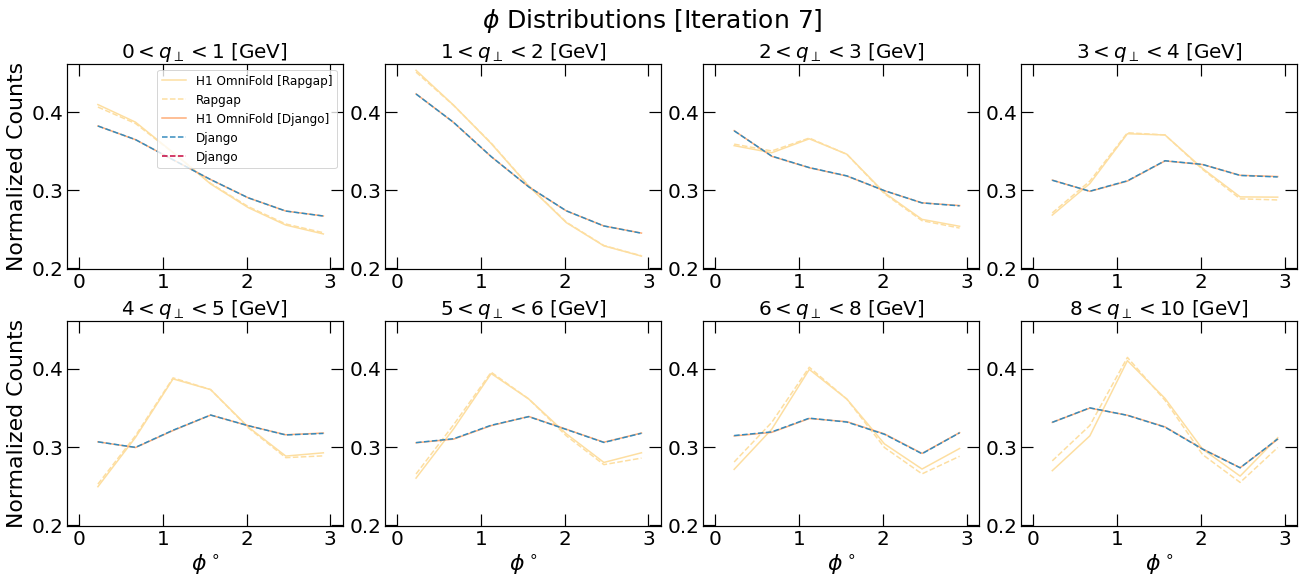

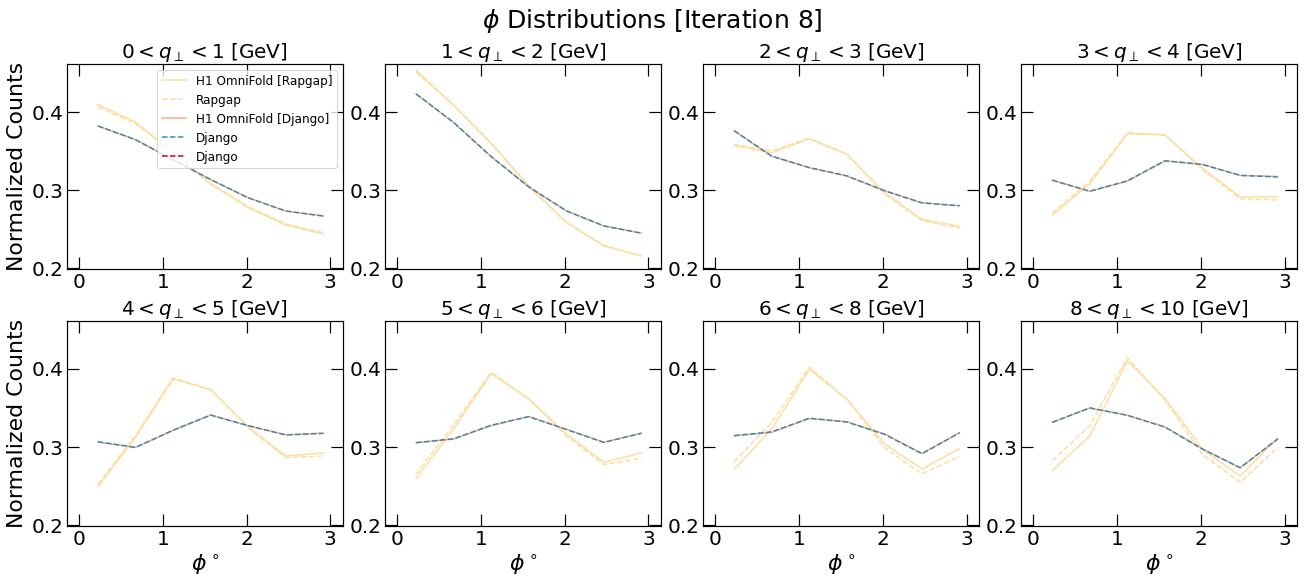

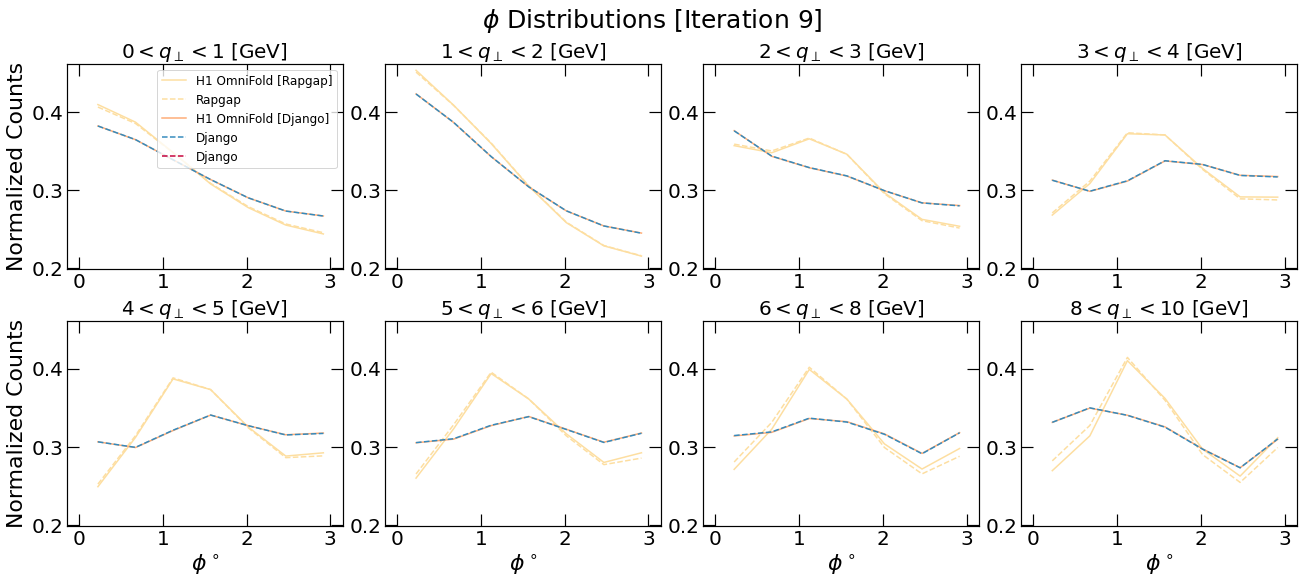

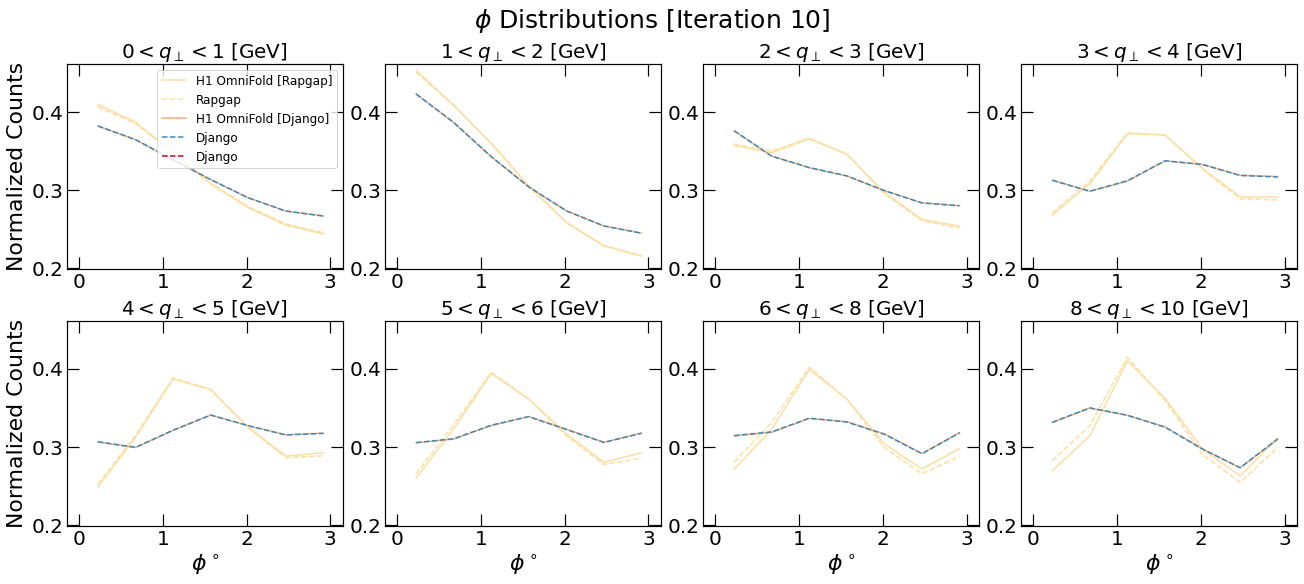

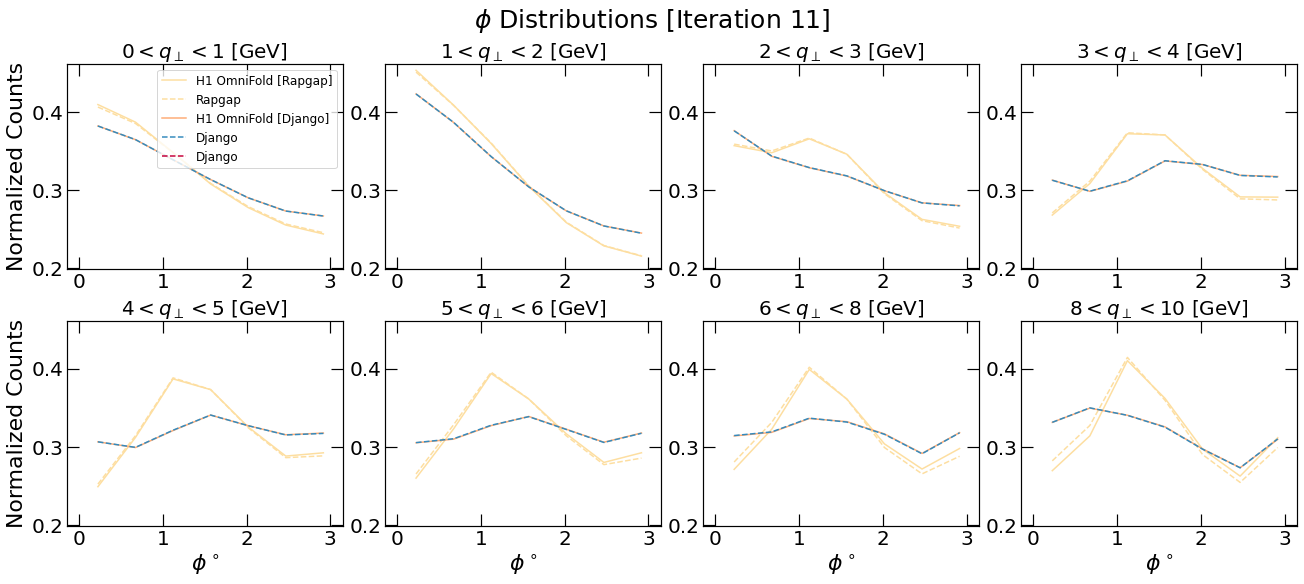

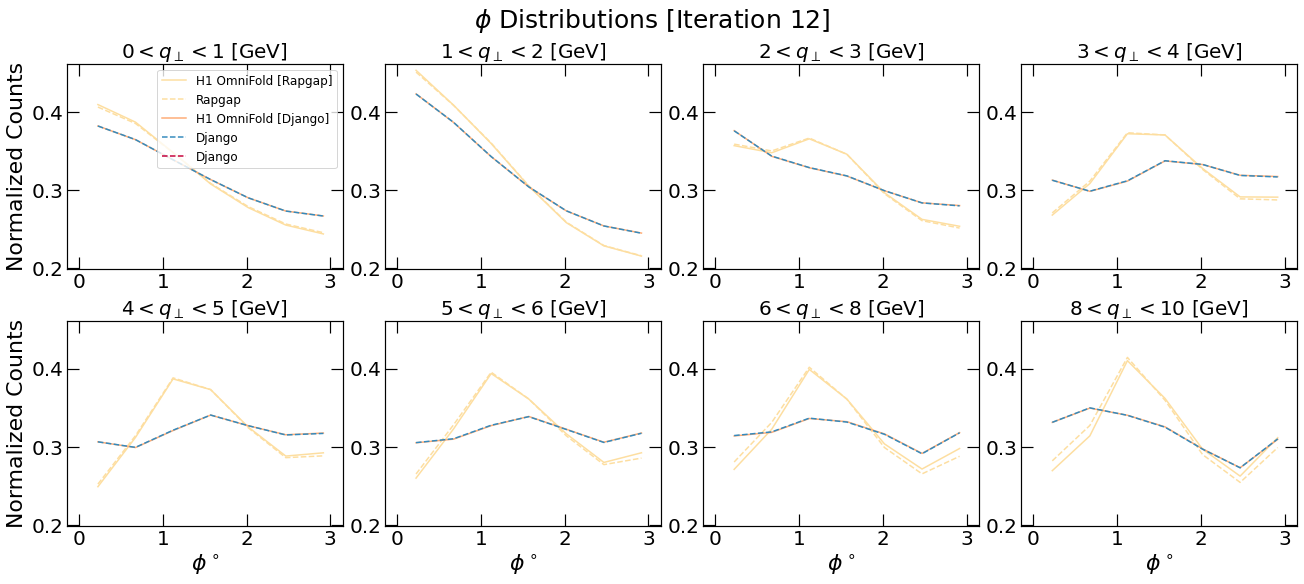

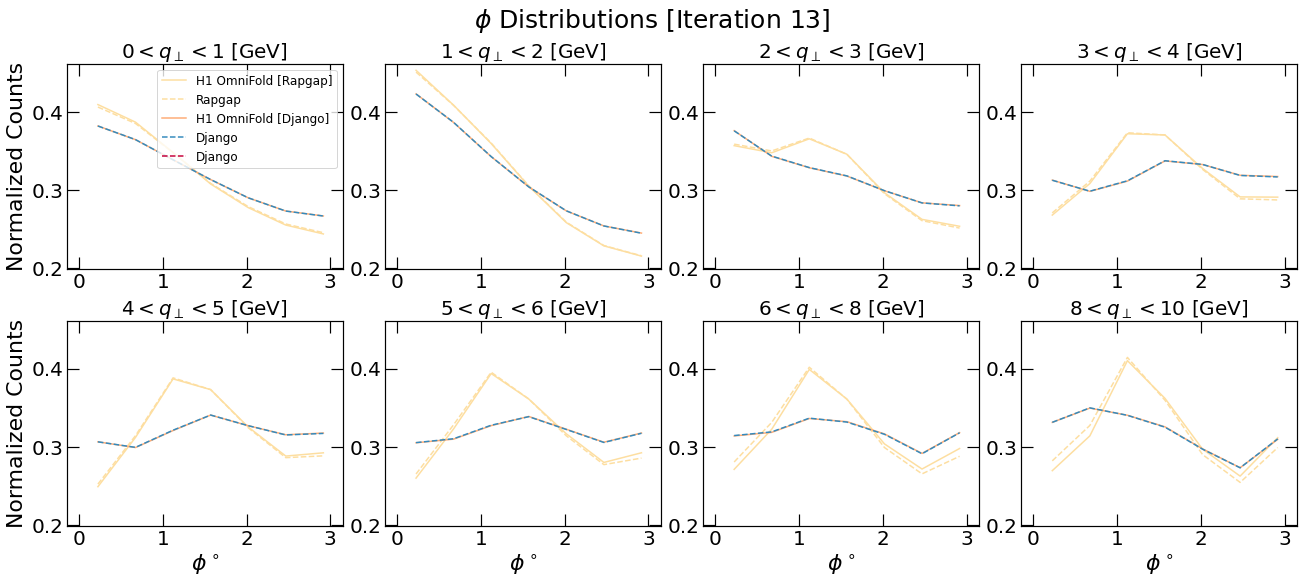

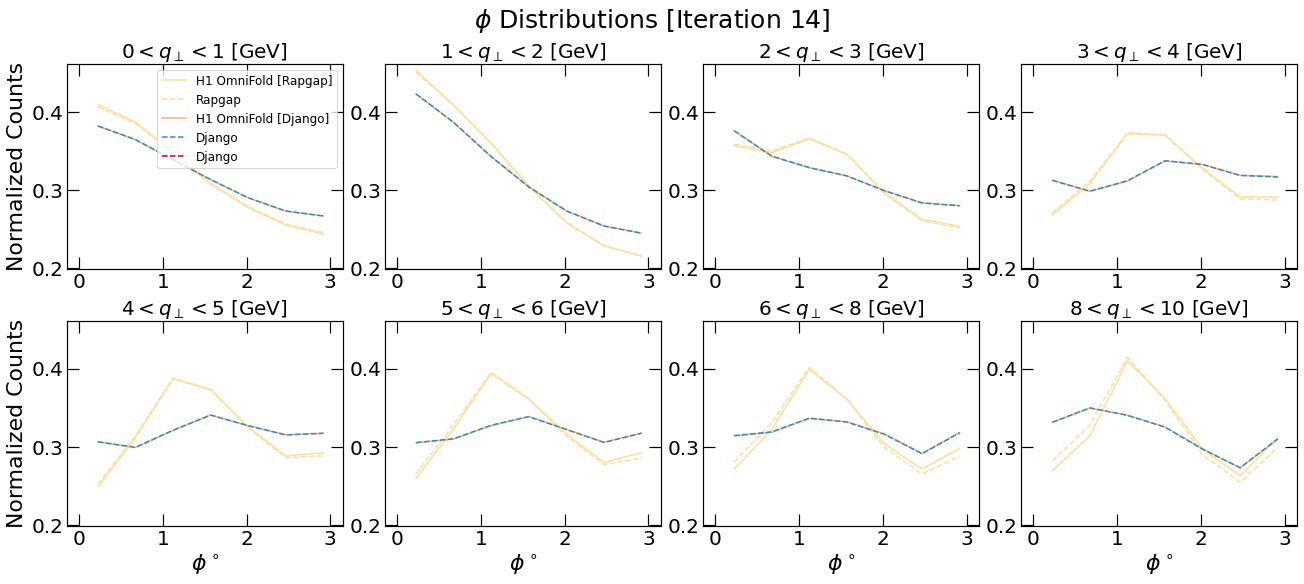

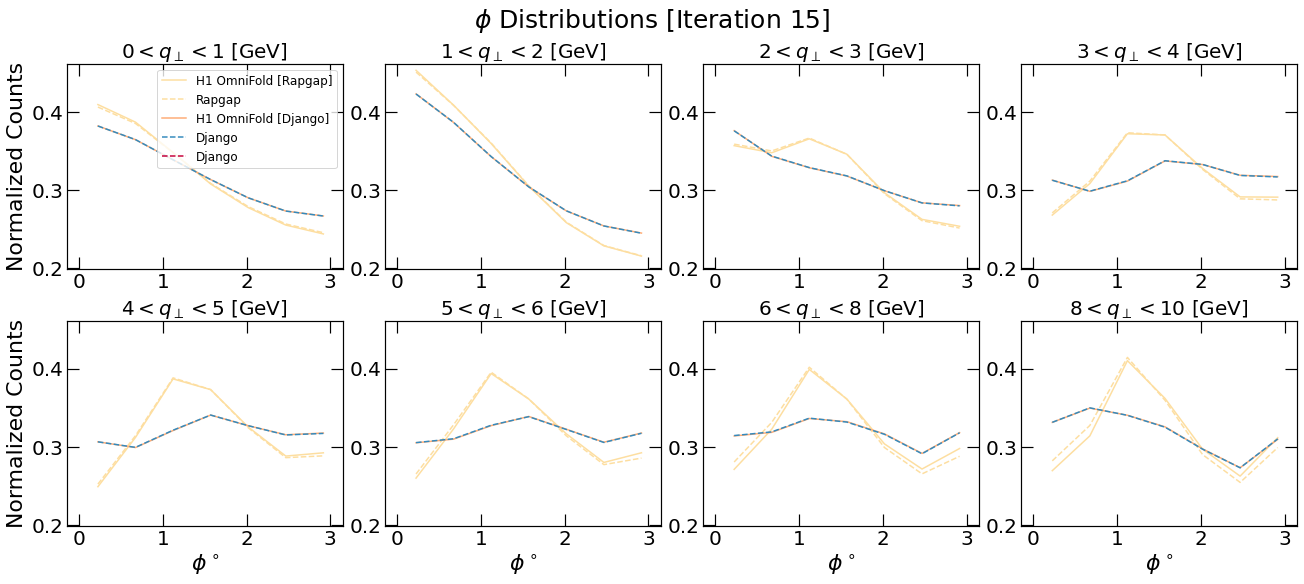

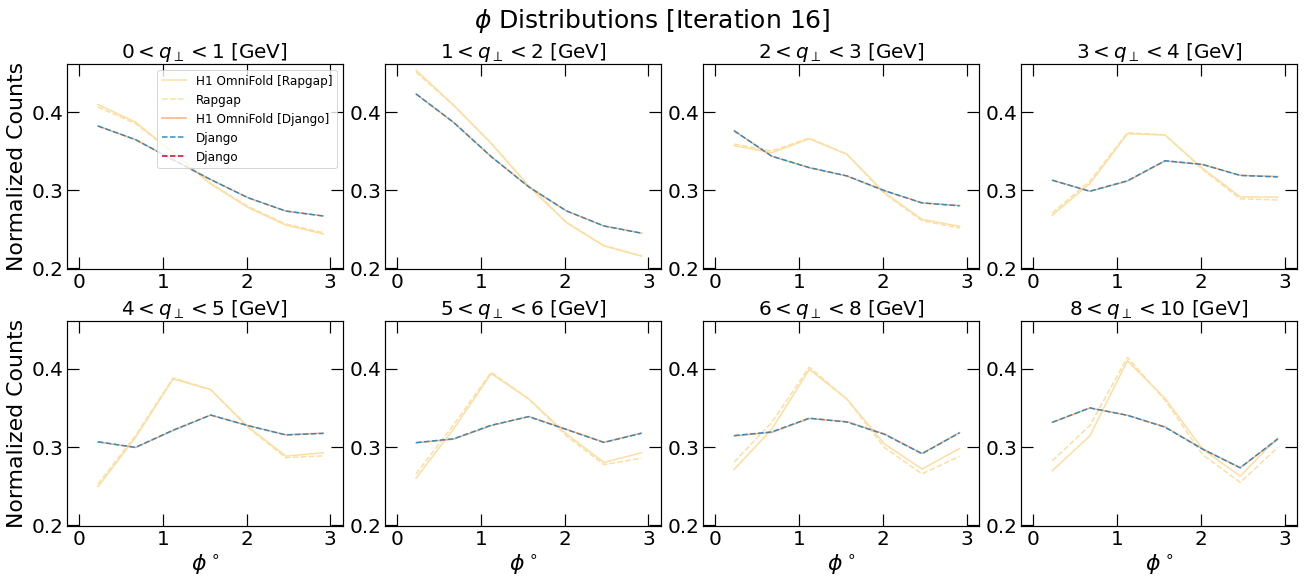

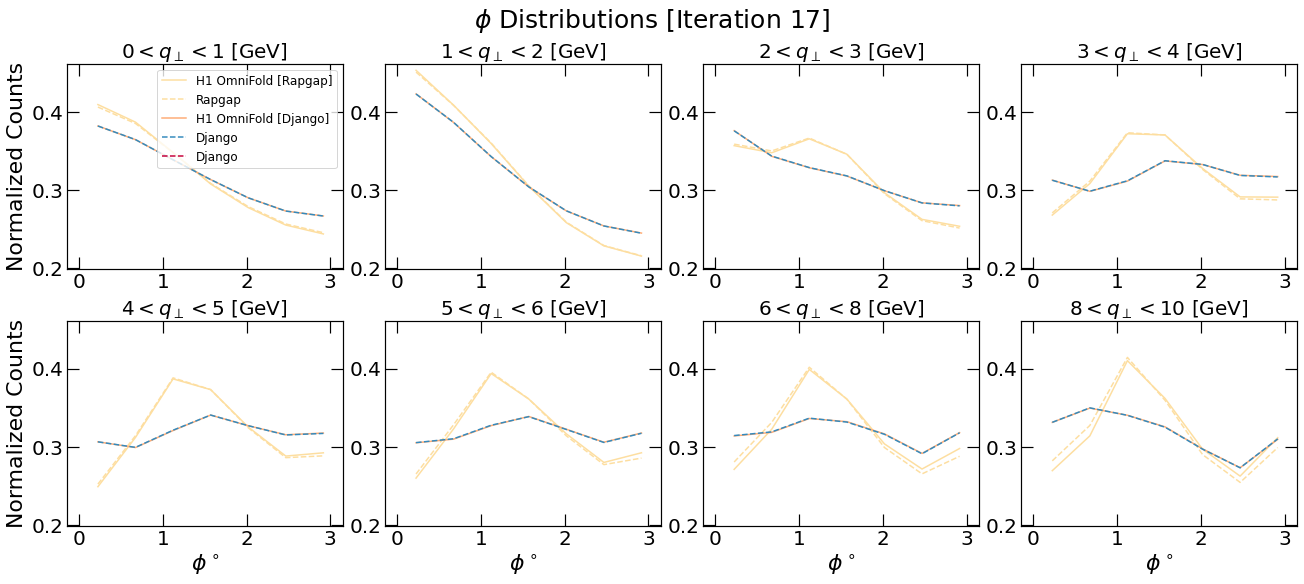

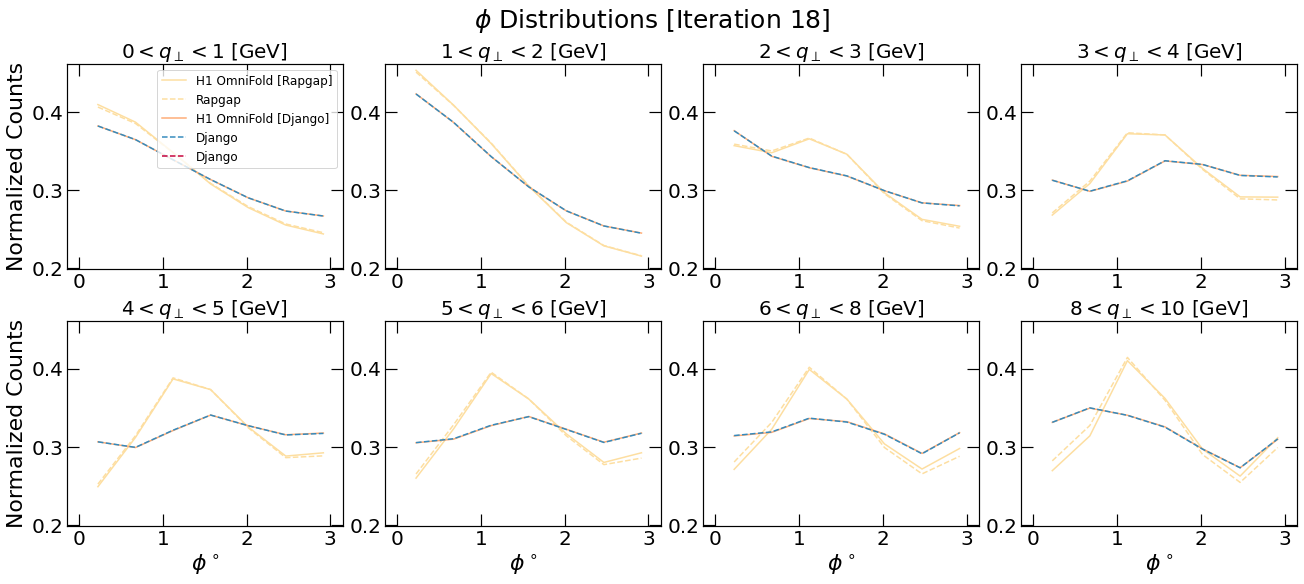

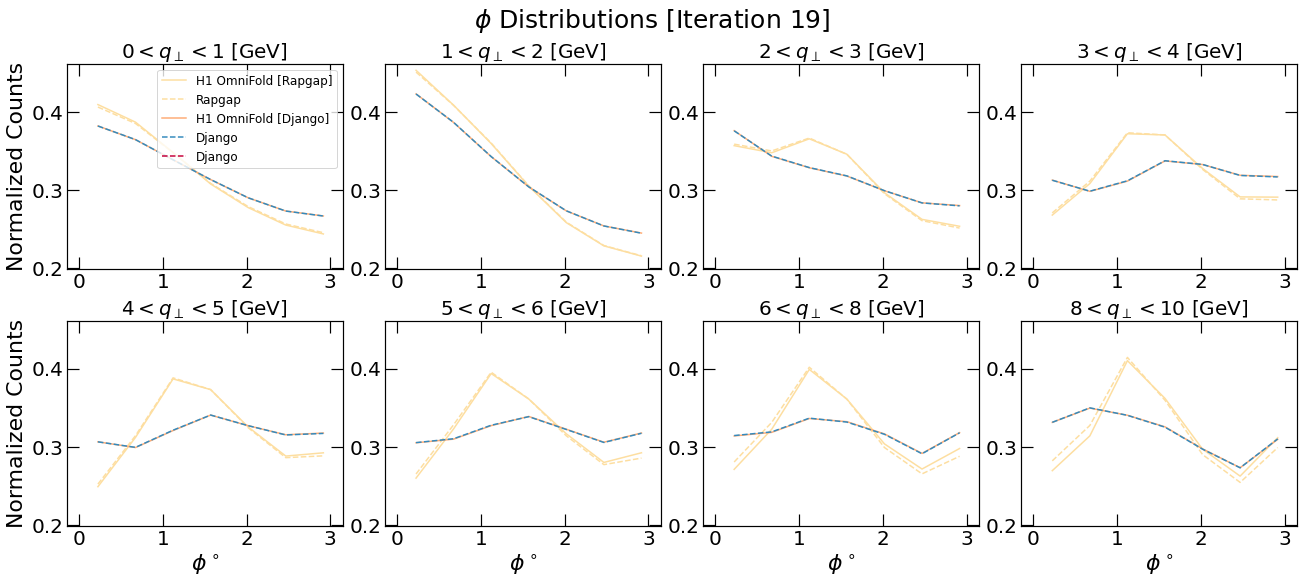

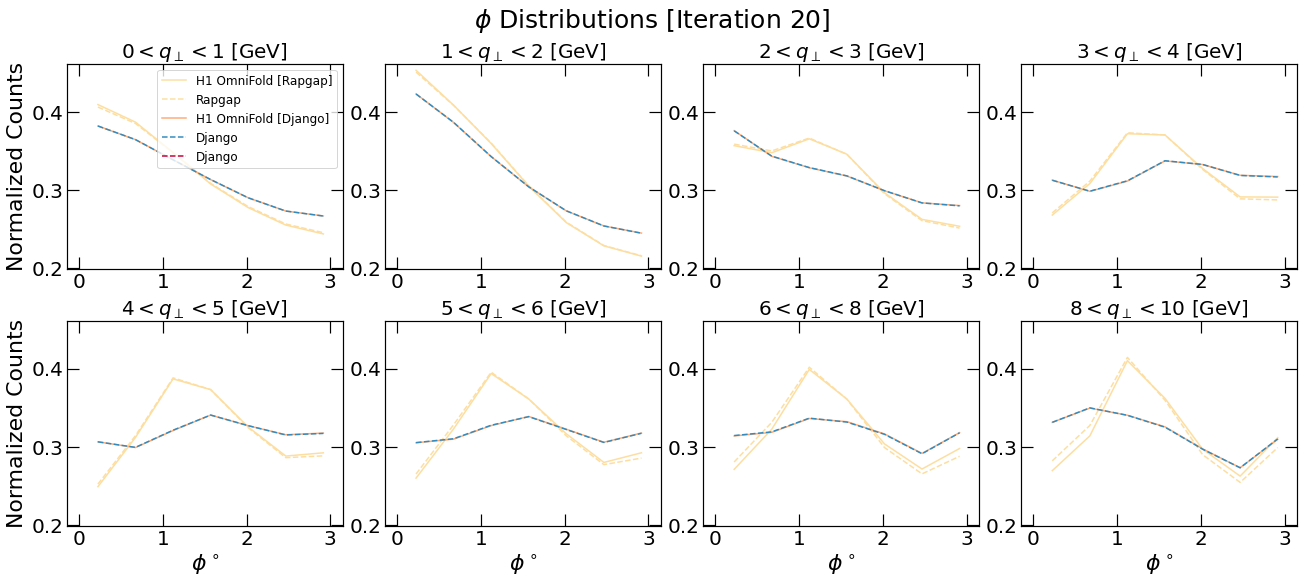

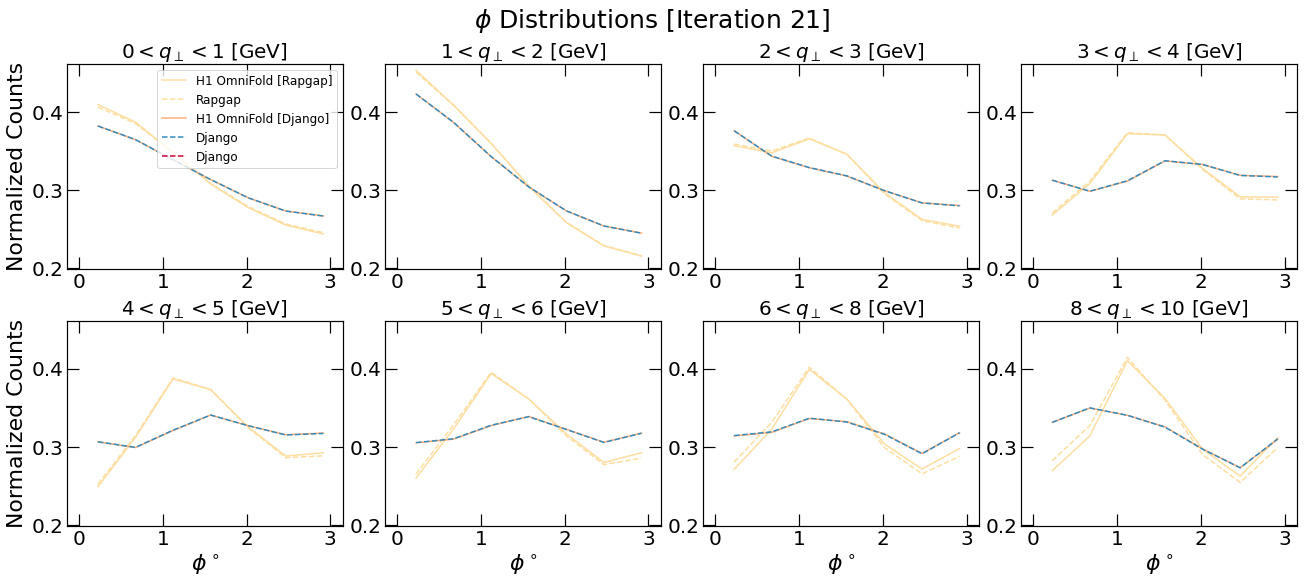

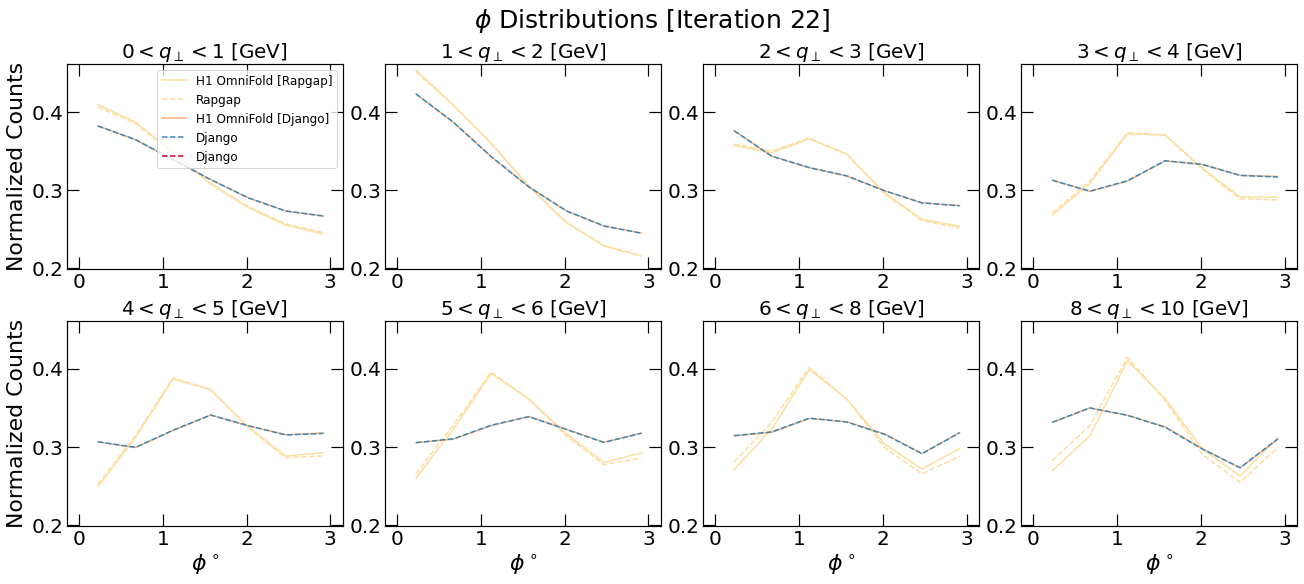

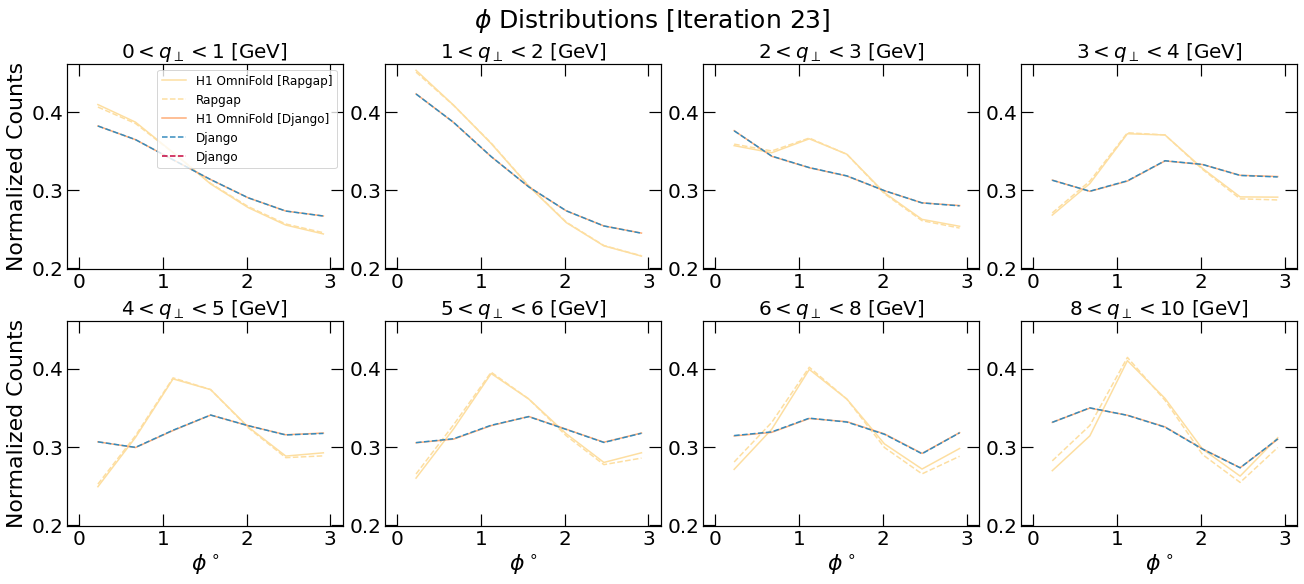

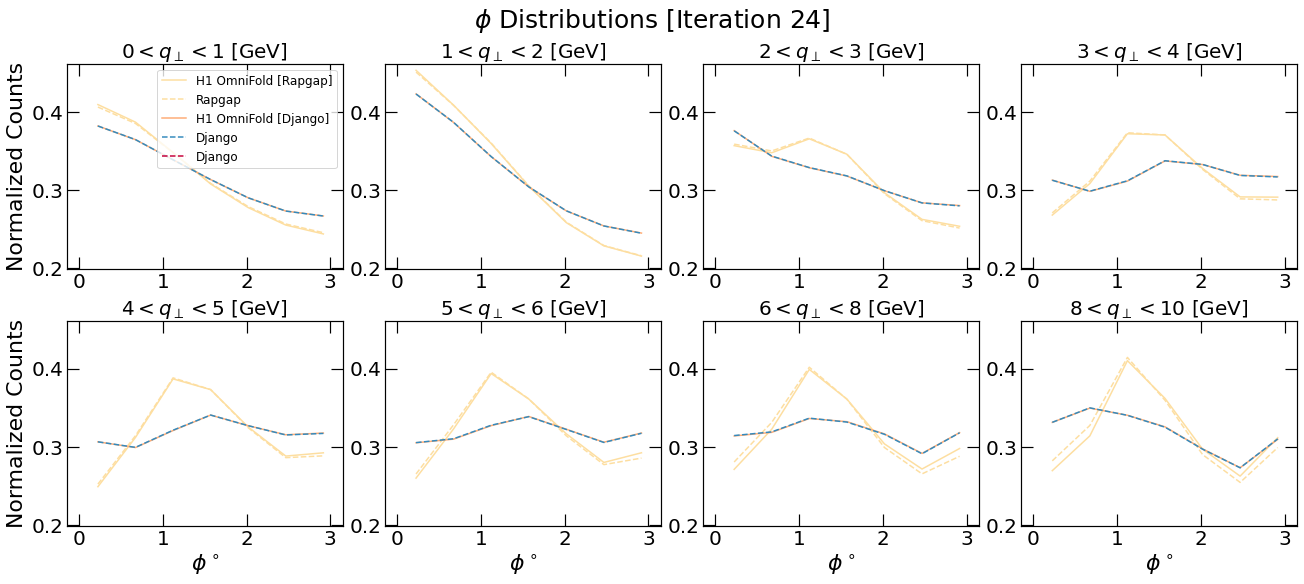

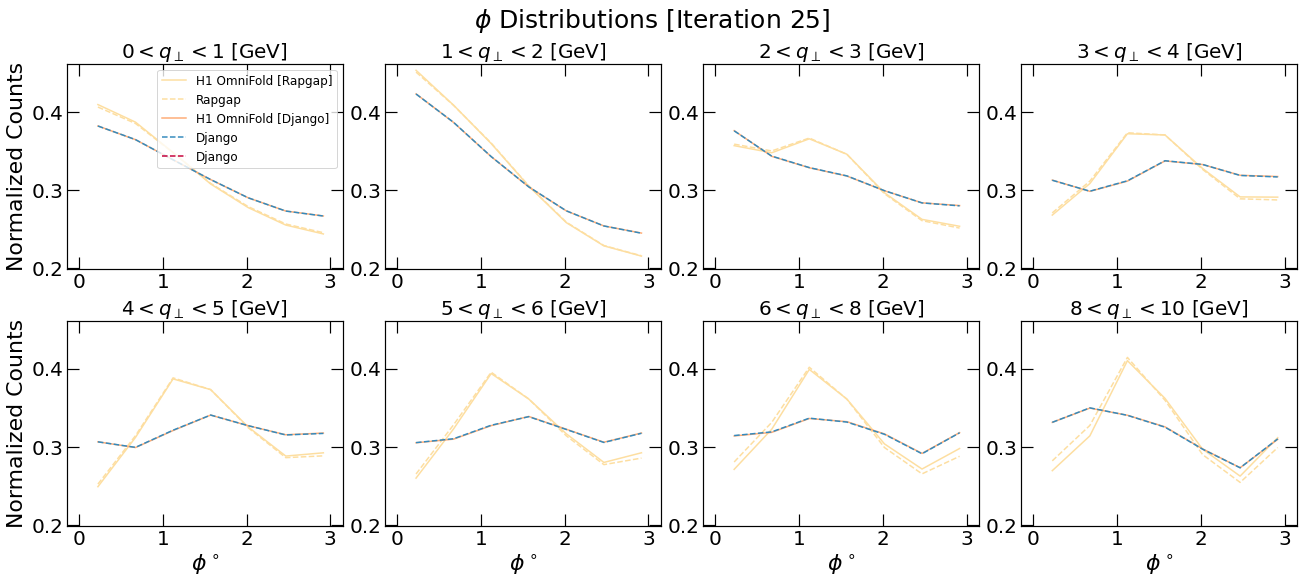

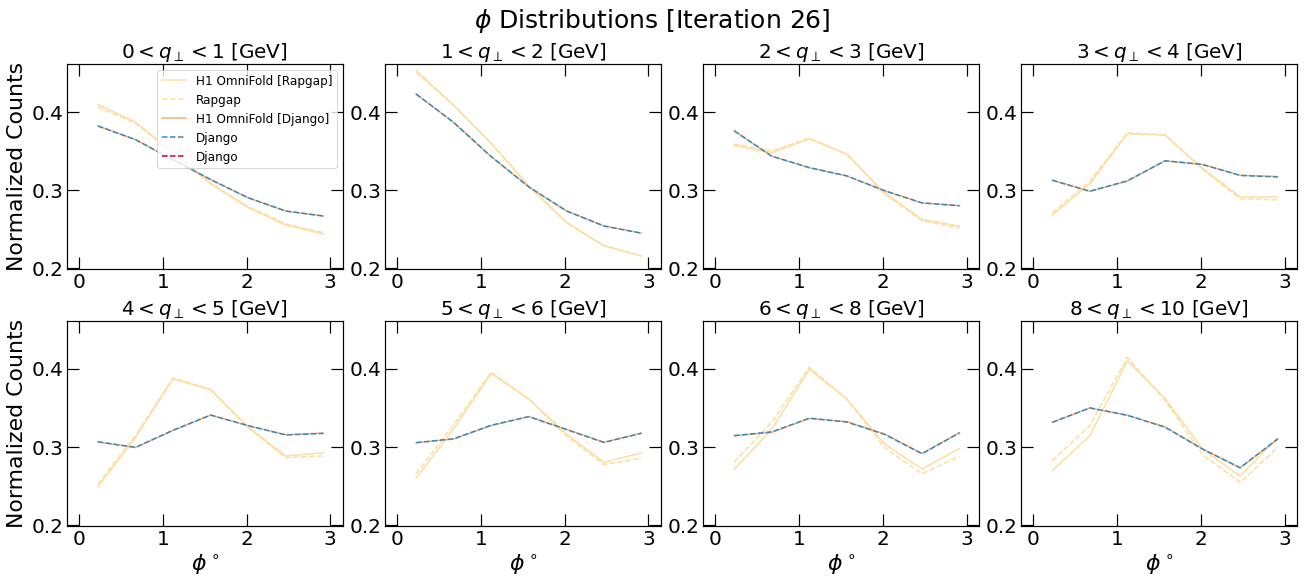

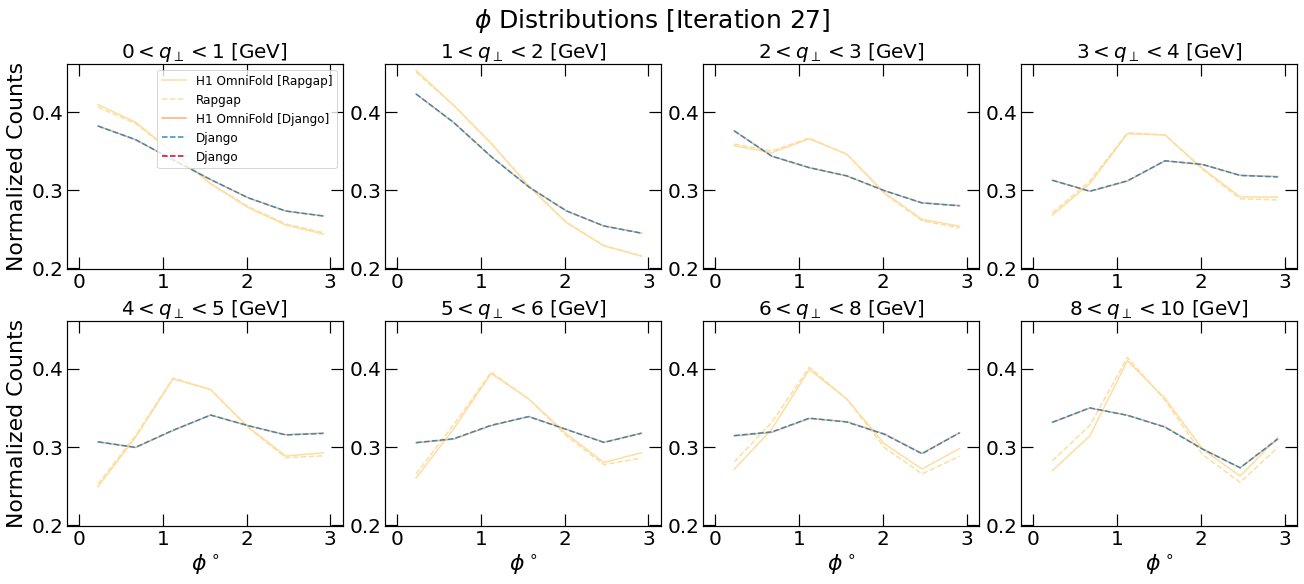

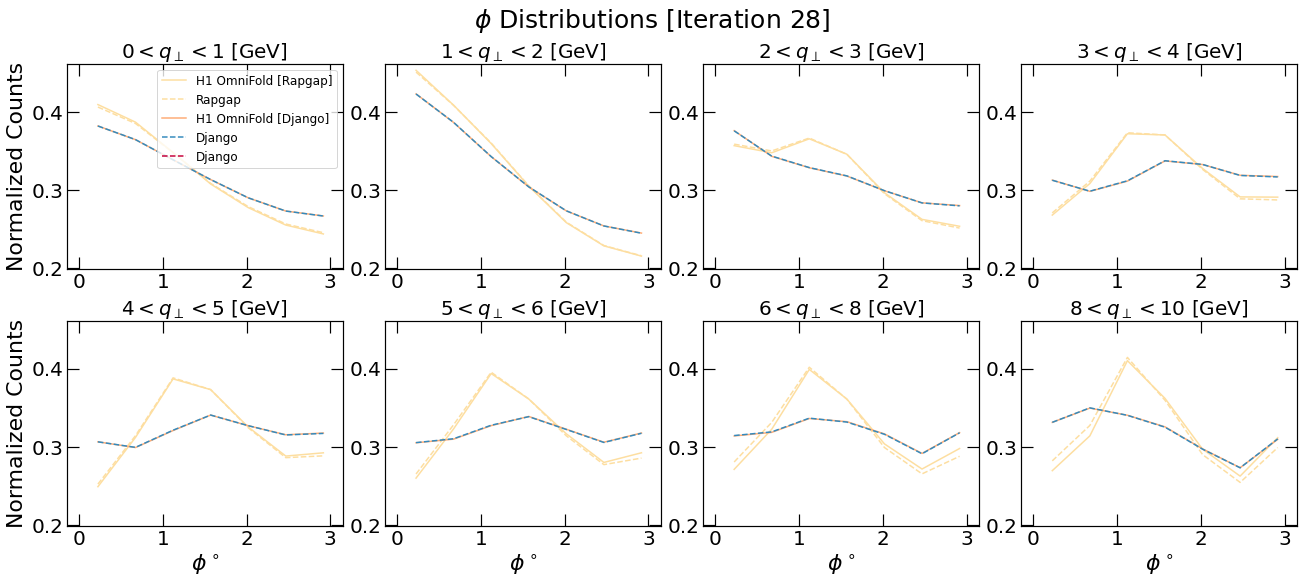

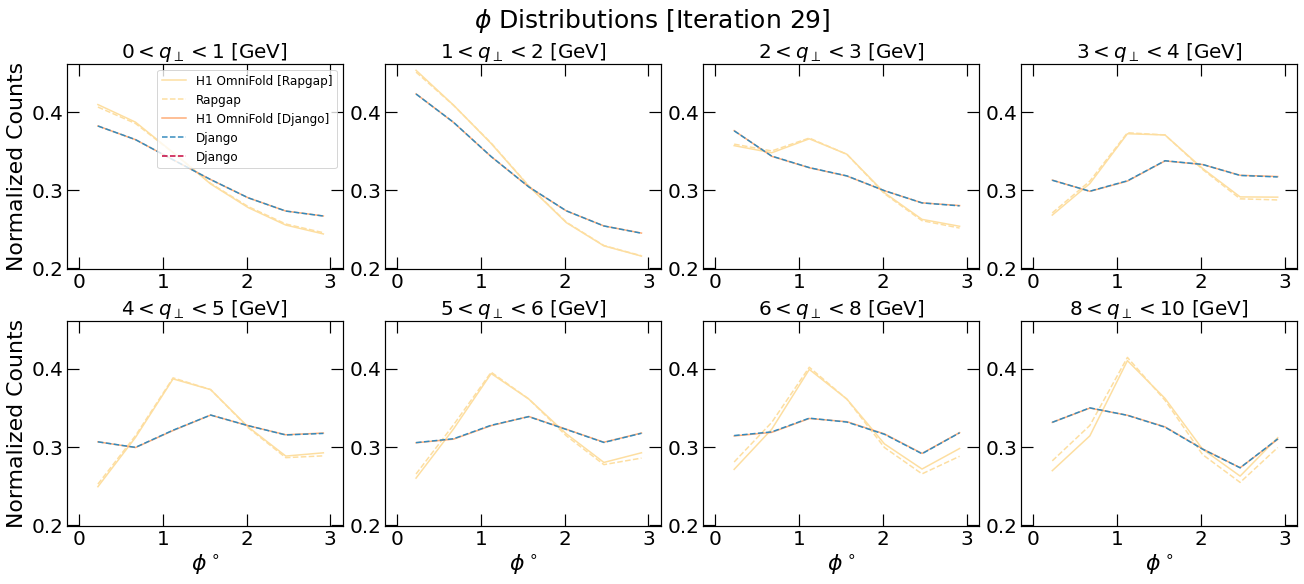

In [17]:
for iter in range(NIter):
    phi_bins = np.linspace(0,3.1416,8)
    h1_rpgp_phi = {}
    h1_djgo_phi = {}
    rpgp_phi = {}
    djgo_phi = {}

    phi_inside_qperp(h1_rpgp_phi, q_perp_bins, phi_bins, q_perp_h1rpgp ,asymm_phi_h1rpgp, pass_avg_weights[i][cuts_h1rpgp]*mc_weights_h1rpgp)
    phi_inside_qperp(rpgp_phi, q_perp_bins, phi_bins, q_perp_h1rpgp ,asymm_phi_h1rpgp, mc_weights_h1rpgp)
    phi_inside_qperp(h1_djgo_phi, q_perp_bins, phi_bins, q_perp_h1djgo ,asymm_phi_h1djgo, django_pass_avg_weights[i][cuts_h1djgo]*mc_weights_h1djgo)
    phi_inside_qperp(djgo_phi, q_perp_bins, phi_bins, q_perp_h1djgo ,asymm_phi_h1djgo, mc_weights_h1djgo)

    fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(18,8),constrained_layout=True)
    axes = axes.ravel()
    for i,ax in enumerate(axes):
        ax.plot(h1_rpgp_phi["bin_centers"],h1_rpgp_phi[str(i)],color=colors[2],label="H1 OmniFold [Rapgap]")
        ax.plot(rpgp_phi["bin_centers"],rpgp_phi[str(i)],color=colors[2],linestyle="--",label="Rapgap")
        ax.plot(h1_djgo_phi["bin_centers"],h1_djgo_phi[str(i)],color=colors[5],label="H1 OmniFold [Django]")
        ax.plot(djgo_phi["bin_centers"],djgo_phi[str(i)],colors[5],linestyle="--",label="Django")
        ax.set_ylim(0.199,0.461)
        #ax.legend(fontsize=10)

        if (i==0):
            ax.legend(fontsize=12)
        if (i%4==0):
            ax.set_ylabel("Normalized Counts")

        if (i>3):
            ax.set_xlabel("$\phi^\circ$")
    
        ax.set_title("$%i < q_\perp < %i$ [GeV]"%(q_perp_bins[i],q_perp_bins[i+1]),fontsize=20)
    
    plt.suptitle("$\phi$ Distributions [Iteration %i]"%(iter),fontsize=25)
    #plt.savefig("Phi_Distributions_Iteration_%i.png"%(iter))

In [ ]:
rapgap = {}
django = {}

averages_in_qperp_bins(rapgap, q_perp_bins, q_perp_h1rpgp ,asymm_phi_h1rpgp, mc_weights_h1rpgp)
averages_in_qperp_bins(django, q_perp_bins, q_perp_h1djgo ,asymm_phi_h1djgo, mc_weights_h1djgo)

differences = np.ones((3,NIter,len(h1_rpgp["q_perp"])))

for iter in range(NIter):
    h1_rpgp = {}
    h1_djgo = {}
    
    averages_in_qperp_bins(h1_rpgp, q_perp_bins, q_perp_h1rpgp ,asymm_phi_h1rpgp, Rapgap_Iterations["{}".format(iter)]*mc_weights_h1rpgp)
    averages_in_qperp_bins(h1_djgo, q_perp_bins, q_perp_h1djgo ,asymm_phi_h1djgo, Django_Iterations["{}".format(iter)]*mc_weights_h1djgo)

    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6),constrained_layout=True)
    axes = axes.ravel()
    for i,ax in enumerate(axes):
        ax.plot(h1_rpgp["q_perp"],h1_rpgp["cos%i"%(i+1)],color=colors[2],label="H1 OmniFold $\cos(%i\phi)$ [Rapgap]"%(i+1))
        ax.plot(rapgap["q_perp"], rapgap["cos%i"%(i+1)],color=colors[2],linestyle="--",label="$\cos(%i\phi)$ [Rapgap]"%(i+1))
        ax.plot(h1_djgo["q_perp"],h1_djgo["cos%i"%(i+1)],color=colors[5],label="H1 OmniFold $\cos(%i\phi)$ [Django]"%(i+1))
        ax.plot(django["q_perp"],django["cos%i"%(i+1)],colors[5],linestyle="--",label="$\cos(%i\phi)$ [Django]"%(i+1))
        ax.set_ylim(-0.201,0.201)
        #ax.legend(fontsize=10)
        
        differences[i,iter] = np.abs(h1_rpgp["cos%i"%(i+1)]-h1_djgo["cos%i"%(i+1)])
        string = r"$\langle\cos(%i\phi)\rangle$"%(i+1)
        string = string.replace("1","")
        ax.set_ylabel(string)
    
        if (i==0):
            ax.legend(fontsize=12)
        if (i>3):
            ax.set_xlabel("$\phi^\circ$")
    
        ax.set_title("$%i < q_\perp < %i$ [GeV]"%(q_perp_bins[i],q_perp_bins[i+1]),fontsize=20)
    
    plt.suptitle("$\cos(n\ \phi)$ Distributions [Iteration %i]"%(iter),fontsize=25)
    plt.savefig("CosPhi_Distributions_Iteration_%i.png"%(iter))

In [ ]:
print(differences)
print(np.shape(differences))

In [ ]:
avg_differences = np.mean(differences,axis=-1)

In [ ]:
print(np.shape(avg_differences))

In [ ]:
avg_per_iteration = np.mean(avg_differences,axis=0)
print(np.shape(avg_per_iteration))

In [ ]:
plt.plot(np.linspace(0,NIter-1,NIter),avg_per_iteration)
plt.title("Mean Difference of Unfolded Rapgap and Django")
plt.xlabel("OmniFold Iteration")
plt.ylabel("Mean Difference [$\cos(n\phi)$]")
plt.tight_layout()
plt.savefig("Avg_Dif_Per_Iteration.pdf")

In [ ]:
print(avg_per_iteration[4])